# Universidade Federal do Rio Grande do Norte
# Instituto Metrópole Digital
# Docente: Ivanovitch Silva
# Discente: Rafael Costa Varela

# Visualização gráfica de dados

Neste notebook, construiremos alguns gráficos a partir de dados das eleições presidenciais de 2018.

# Importando bibliotecas

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Carregando os dados

In [4]:
def load_csv(csv_file):
    return pd.read_csv(csv_file, sep=";", encoding="ISO-8859-1")

votacao_br = load_csv('votacao_candidato_munzona_2018_BR.csv')
votacao_rn = load_csv('votacao_candidato_munzona_2018_RN.csv')

# Visualização inicial dos dados

In [8]:
votacao_br.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,50,PSOL,Partido Socialismo e Liberdade,280000050035,VAMOS SEM MEDO DE MUDAR O BRASIL,PSOL / PCB,4,NÃO ELEITO,N,10
1,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,51,PATRI,Patriota,280000050072,PARTIDO ISOLADO,PATRI,4,NÃO ELEITO,N,33
2,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,691
3,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,5
4,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,45,PSDB,Partido da Social Democracia Brasileira,280000050070,PARA UNIR O BRASIL,PSDB / PTB / PP / PR / DEM / SOLIDARIEDADE / P...,4,NÃO ELEITO,N,1346


In [6]:
votacao_rn.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,15,MDB,Movimento Democrático Brasileiro,200000050285,100% RN,PDT / PP / MDB / PODE / DEM,4,NÃO ELEITO,N,863
1,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,25,DEM,Democratas,200000050360,100% RN II,PDT / PP / MDB / PODE / DEM,5,SUPLENTE,N,0
2,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,70,AVANTE,AVANTE,200000050107,TRABALHO E SUPERAÇÃO III,PRB / AVANTE,5,SUPLENTE,N,0
3,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,20,PSC,Partido Social Cristão,200000050084,RENOVA RN III,PATRI / PSL / PSC / DC / PPL,5,SUPLENTE,N,0
4,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,77,SOLIDARIEDADE,Solidariedade,200000050024,RENOVA RN I,SOLIDARIEDADE / PSL / DC / PV / PSC,5,SUPLENTE,N,4


Uma primeira pergunta que se pode fazer é: Quantos municípios de cada estado estão representados nestes dados? A resposta segue no gráfico a seguir:

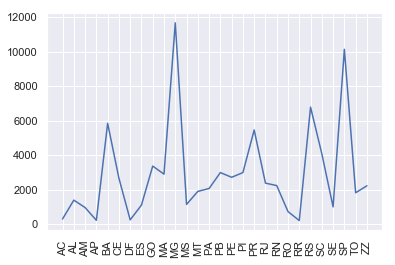

In [119]:
%matplotlib inline

contagens = votacao_br['SG_UF'].value_counts()
plt.xticks(rotation=90)
sns.lineplot(data=contagens)

#plt.plot(votacao_br['SG_UF'].value_counts(), c='brown', label='Número de municípios')
#plt.tick_params(bottom='off', top='off', left='off', right='off')
#locs, labels = plt.xticks()

#plt.legend(loc='upper right')

#### Gráfico 1: distribuição de municípios por estado

Existe uma crença popular de que o estado de Minas Gerais é decisivo em resultados de eleições. Um primeiro indicativo pode ser visto acima: é o estado com mais municípios.

Vamos verificar agora as distribuições de votos por candidato nos estados de Minas Gerais e São Paulo.

In [76]:
def filtra_por_estado(df, estado):
    return df['SG_UF'] == estado
    
minas_gerais = filtra_por_estado(votacao_br, 'MG')
sao_paulo = filtra_por_estado(votacao_br, 'SP')
display(votacao_br[sao_paulo]['NM_CANDIDATO'].value_counts())
print('-------------------------------')
display(votacao_br[minas_gerais]['NM_CANDIDATO'].value_counts())

HENRIQUE DE CAMPOS MEIRELLES                  780
CIRO FERREIRA GOMES                           780
ALVARO FERNANDES DIAS                         780
VERA LUCIA PEREIRA DA SILVA SALGADO           780
GERALDO JOSÉ RODRIGUES ALCKMIN FILHO          780
GUILHERME CASTRO BOULOS                       780
JAIR MESSIAS BOLSONARO                        780
JOÃO VICENTE FONTELLA GOULART                 780
JOSE MARIA EYMAEL                             780
BENEVENUTO DACIOLO FONSECA DOS SANTOS         780
FERNANDO HADDAD                               780
JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO        780
MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA    780
Name: NM_CANDIDATO, dtype: int64

-------------------------------


HENRIQUE DE CAMPOS MEIRELLES                  898
ALVARO FERNANDES DIAS                         898
VERA LUCIA PEREIRA DA SILVA SALGADO           898
BENEVENUTO DACIOLO FONSECA DOS SANTOS         898
JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO        898
CIRO FERREIRA GOMES                           898
GERALDO JOSÉ RODRIGUES ALCKMIN FILHO          898
GUILHERME CASTRO BOULOS                       898
JAIR MESSIAS BOLSONARO                        898
JOÃO VICENTE FONTELLA GOULART                 898
JOSE MARIA EYMAEL                             898
FERNANDO HADDAD                               898
MARIA OSMARINA MARINA DA SILVA VAZ DE LIMA    898
Name: NM_CANDIDATO, dtype: int64

Conforme é possível observar, em cada estado as quantidades de votos são as mesmas para todos os candidatos. Vamos verificar então, quantos votos foram computados em cada estado.

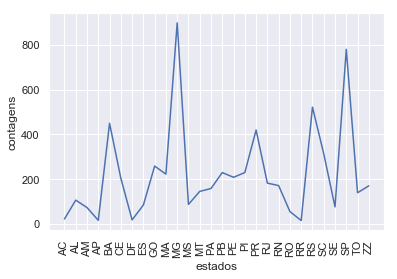

In [126]:
estados = []
contagens = []

for estado in votacao_br['SG_UF'].unique():
    estados.append(estado)
    estado_filtrado = filtra_por_estado(votacao_br, estado)
    contagens.append(votacao_br[estado_filtrado]['NM_CANDIDATO'].value_counts()[0])

contagens_de_votos = pd.DataFrame({'estados': estados, 'contagens': contagens}, index=estados)
plt.xticks(rotation=90)
sns.lineplot(x='estados', y='contagens', data=contagens_de_votos)

#### Gráfico 2: distribuição de votos por estado

Novamente os padrões se repetem: conforme é possível observar, Minas Gerais continua sendo detentora do maior número de votos.